# ML analysis: MDD vs control

In [1]:
# importing all the packages I need for all my models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import matplotlib.pyplot as plt 
from sklearn.metrics import classification_report
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.linear_model import LogisticRegressionCV
import random
pd.options.mode.chained_assignment = None

## Transcripts for ML input

I used two sets of transcripts, each compared with a benchmark set of random transcripts, for ML input:

1. random transcripts compared with transcripts on the MT chromosome
2. random transcripts compared with transcripts with the GO term 'mitochondrial respirasome'

### Random transcripts

In [2]:
# selection of random transcripts from list
# random.choices(tx_BDcontrol, k=13)
randomtx_MTchr = ['ENST00000600080.5','ENST00000397572.5','ENST00000635877.1','ENST00000543942.6',
'ENST00000286494.9','ENST00000605544.1','ENST00000561852.5','ENST00000429670.3',
'ENST00000511500.1','ENST00000475796.5','ENST00000547135.5','ENST00000605689.1',
'ENST00000492310.5']

In [3]:
# selection of random transcripts from list
# random.choices(tx_BDcontrol, k=255)
randomtx_MTresp = ['ENST00000535515.5','ENST00000574494.1','ENST00000531227.1','ENST00000563462.1',
'ENST00000518450.5','ENST00000641655.1','ENST00000369669.5','ENST00000627703.2',
'ENST00000531427.5','ENST00000452554.3','ENST00000548524.5','ENST00000533270.1',
'ENST00000636277.1','ENST00000580806.5','ENST00000444189.7','ENST00000588683.1',
'ENST00000569320.5','ENST00000432343.1','ENST00000402297.6','ENST00000632698.1',
'ENST00000381286.7','ENST00000652439.1','ENST00000473413.1','ENST00000447555.5',
'ENST00000379651.7','ENST00000393867.5','ENST00000508053.5','ENST00000537833.5',
'ENST00000620667.1','ENST00000473647.1','ENST00000430838.2','ENST00000508208.5',
'ENST00000586762.2','ENST00000422787.1','ENST00000644629.1','ENST00000620127.3',
'ENST00000593411.1','ENST00000591228.4','ENST00000361733.7','ENST00000472541.5',
'ENST00000414977.5','ENST00000556079.1','ENST00000371208.4','ENST00000511891.5',
'ENST00000347401.7','ENST00000478640.6','ENST00000483371.1','ENST00000367058.7',
'ENST00000639822.1','ENST00000439752.1','ENST00000374885.5','ENST00000253925.11',
'ENST00000419015.1','ENST00000520992.5','ENST00000343599.5','ENST00000472864.1',
'ENST00000456906.5','ENST00000544168.5','ENST00000467490.5','ENST00000533498.1',
'ENST00000496105.1','ENST00000633965.1','ENST00000565585.5','ENST00000207636.9',
'ENST00000542832.1','ENST00000490348.1','ENST00000442232.1','ENST00000640582.2',
'ENST00000448958.2','ENST00000634908.1','ENST00000470954.2','ENST00000416465.5',
'ENST00000479323.1','ENST00000478224.5','ENST00000572244.5','ENST00000431286.1',
'ENST00000585531.1','ENST00000475994.1','ENST00000491728.5','ENST00000619532.1',
'ENST00000611198.4','ENST00000580145.5','ENST00000320665.10','ENST00000565546.5',
'ENST00000453375.1','ENST00000632533.1','ENST00000486535.1','ENST00000310078.12',
'ENST00000402399.6','ENST00000507142.5','ENST00000622674.1','ENST00000478475.5',
'ENST00000512818.5','ENST00000374840.8','ENST00000555573.5','ENST00000495742.5',
'ENST00000549451.1','ENST00000507115.5','ENST00000237163.9','ENST00000650921.1',
'ENST00000492457.1','ENST00000483378.1','ENST00000453856.5','ENST00000638438.1',
'ENST00000628302.2','ENST00000469014.1','ENST00000525605.1','ENST00000478680.1',
'ENST00000643493.1','ENST00000640045.1','ENST00000466375.2','ENST00000643537.1',
'ENST00000342669.7','ENST00000511593.6','ENST00000602622.5','ENST00000560913.1',
'ENST00000326183.3','ENST00000300870.15','ENST00000640690.1','ENST00000632297.1',
'ENST00000391411.10','ENST00000409324.7','ENST00000548732.2','ENST00000418576.3',
'ENST00000505441.1','ENST00000427822.6','ENST00000453515.1','ENST00000372183.7',
'ENST00000526686.1','ENST00000469169.5','ENST00000588492.5','ENST00000423263.5',
'ENST00000372611.5','ENST00000498836.5','ENST00000564132.1','ENST00000524603.1',
'ENST00000468878.1','ENST00000471097.1','ENST00000395305.7','ENST00000602865.1',
'ENST00000382315.7','ENST00000518154.5','ENST00000534783.1','ENST00000457662.2',
'ENST00000537562.5','ENST00000642520.1','ENST00000632958.1','ENST00000585879.1',
'ENST00000426266.5','ENST00000461659.1','ENST00000638304.1','ENST00000419794.1',
'ENST00000481453.5','ENST00000443437.6','ENST00000477695.5','ENST00000558092.1',
'ENST00000643264.1','ENST00000332826.7','ENST00000451587.5','ENST00000534760.1',
'ENST00000481032.1','ENST00000265689.9','ENST00000607208.1','ENST00000382032.3',
'ENST00000510299.2','ENST00000466626.1','ENST00000528628.5','ENST00000526842.5',
'ENST00000475405.2','ENST00000534688.2','ENST00000596682.5','ENST00000472867.2',
'ENST00000381567.8','ENST00000418646.5','ENST00000383130.7','ENST00000410040.5',
'ENST00000488876.5','ENST00000358912.5','ENST00000533695.1','ENST00000568545.5',
'ENST00000448299.6','ENST00000422720.2','ENST00000473946.1','ENST00000401672.7',
'ENST00000564192.5','ENST00000506646.5','ENST00000622731.4','ENST00000421470.1',
'ENST00000592814.5','ENST00000527790.5','ENST00000510493.5','ENST00000273590.3',
'ENST00000576460.5','ENST00000642399.1','ENST00000583328.5','ENST00000619160.4',
'ENST00000348261.11','ENST00000397472.6','ENST00000457841.5','ENST00000341686.7',
'ENST00000480859.5','ENST00000545955.5','ENST00000621629.4','ENST00000436730.7',
'ENST00000538766.1','ENST00000432228.1','ENST00000495855.1','ENST00000567921.1',
'ENST00000496784.1','ENST00000220531.7','ENST00000549482.1','ENST00000428931.6',
'ENST00000415077.1','ENST00000492838.1','ENST00000543539.1','ENST00000562008.5',
'ENST00000519082.5','ENST00000608830.5','ENST00000498181.6','ENST00000468607.1',
'ENST00000646379.1','ENST00000633452.1','ENST00000609658.1','ENST00000525990.1',
'ENST00000579140.5','ENST00000620763.1','ENST00000487389.5','ENST00000482397.1',
'ENST00000489123.1','ENST00000530553.1','ENST00000529311.5','ENST00000426683.5',
'ENST00000518855.5','ENST00000640831.1','ENST00000485277.1','ENST00000451664.1',
'ENST00000535955.5','ENST00000499453.2','ENST00000533651.1','ENST00000587646.1',
'ENST00000381392.5','ENST00000402105.7','ENST00000400318.6','ENST00000493625.5',
'ENST00000544078.2','ENST00000294337.7','ENST00000603850.1','ENST00000389574.7',
'ENST00000248054.9','ENST00000465841.1','ENST00000483949.1','ENST00000469838.5',
'ENST00000359866.9','ENST00000291700.9', 'ENST00000477078.2']

### Transcripts on MT chromosome

In [4]:
# reading in MT transcripts from MT chromosome
mt_tx = pd.read_csv("/Users/elenazhang/ncbi/public/sra/mt.txt", delimiter = "\t")
mt_tx.head()

,Gene stable ID,Gene stable ID version,Transcript stable ID,Transcript stable ID version
0,ENSG00000210049,ENSG00000210049.1,ENST00000387314,ENST00000387314.1
1,ENSG00000211459,ENSG00000211459.2,ENST00000389680,ENST00000389680.2
2,ENSG00000210077,ENSG00000210077.1,ENST00000387342,ENST00000387342.1
3,ENSG00000210082,ENSG00000210082.2,ENST00000387347,ENST00000387347.2
4,ENSG00000209082,ENSG00000209082.1,ENST00000386347,ENST00000386347.1


In [5]:
mt_tx_ids = mt_tx["Transcript stable ID version"].to_list()
print(mt_tx_ids)
len(mt_tx_ids)

['ENST00000387314.1', 'ENST00000389680.2', 'ENST00000387342.1', 'ENST00000387347.2', 'ENST00000386347.1', 'ENST00000361390.2', 'ENST00000387365.1', 'ENST00000387372.1', 'ENST00000387377.1', 'ENST00000361453.3', 'ENST00000387382.1', 'ENST00000387392.1', 'ENST00000387400.1', 'ENST00000387405.1', 'ENST00000387409.1', 'ENST00000361624.2', 'ENST00000387416.2', 'ENST00000387419.1', 'ENST00000361739.1', 'ENST00000387421.1', 'ENST00000361851.1', 'ENST00000361899.2', 'ENST00000362079.2', 'ENST00000387429.1', 'ENST00000361227.2', 'ENST00000387439.1', 'ENST00000361335.1', 'ENST00000361381.2', 'ENST00000387441.1', 'ENST00000387449.1', 'ENST00000387456.1', 'ENST00000361567.2', 'ENST00000361681.2', 'ENST00000387459.1', 'ENST00000361789.2', 'ENST00000387460.2', 'ENST00000387461.2']


37

### Transcripts with GO term 'mitochondrial respirasome'

In [6]:
mtres_tx = pd.read_csv("/Volumes/horizons/mart_export_mtrespirasome.txt", delimiter = "\t")
mtres_tx.head()

,Gene stable ID,Gene stable ID version,Transcript stable ID,Transcript stable ID version
0,ENSG00000198888,ENSG00000198888.2,ENST00000361390,ENST00000361390.2
1,ENSG00000198888,ENSG00000198888.2,ENST00000361390,ENST00000361390.2
2,ENSG00000198888,ENSG00000198888.2,ENST00000361390,ENST00000361390.2
3,ENSG00000198888,ENSG00000198888.2,ENST00000361390,ENST00000361390.2
4,ENSG00000198763,ENSG00000198763.3,ENST00000361453,ENST00000361453.3


In [7]:
mtres_tx_ids = mtres_tx["Transcript stable ID version"].to_list()
print(mtres_tx_ids)
len(mtres_tx_ids)

['ENST00000361390.2', 'ENST00000361390.2', 'ENST00000361390.2', 'ENST00000361390.2', 'ENST00000361453.3', 'ENST00000361453.3', 'ENST00000361453.3', 'ENST00000361624.2', 'ENST00000361624.2', 'ENST00000361624.2', 'ENST00000361624.2', 'ENST00000361624.2', 'ENST00000361624.2', 'ENST00000361739.1', 'ENST00000362079.2', 'ENST00000361227.2', 'ENST00000361227.2', 'ENST00000361227.2', 'ENST00000361335.1', 'ENST00000361335.1', 'ENST00000361381.2', 'ENST00000361381.2', 'ENST00000361381.2', 'ENST00000361567.2', 'ENST00000361567.2', 'ENST00000361567.2', 'ENST00000361567.2', 'ENST00000361681.2', 'ENST00000361789.2', 'ENST00000361789.2', 'ENST00000605916.1', 'ENST00000605916.1', 'ENST00000605916.1', 'ENST00000605916.1', 'ENST00000605916.1', 'ENST00000607132.1', 'ENST00000630971.2', 'ENST00000630971.2', 'ENST00000630971.2', 'ENST00000630971.2', 'ENST00000630971.2', 'ENST00000605927.3', 'ENST00000630511.1', 'ENST00000628740.2', 'ENST00000628740.2', 'ENST00000628740.2', 'ENST00000628740.2', 'ENST0000062

881

## Metadata and matrix preparation

In [8]:
matrix_MDDcontrol = pd.read_csv("/Volumes/horizons/test/3_analysis/sleuth_matrix.csv")

In [9]:
matrix_MDDcontrol_T = matrix_MDDcontrol.T
matrix_MDDcontrol_T.columns = matrix_MDDcontrol_T.iloc[0]
matrix_MDDcontrol_T = matrix_MDDcontrol_T[1:]
matrix_MDDcontrol_T = matrix_MDDcontrol_T.reset_index()
matrix_MDDcontrol_T.head()

Unnamed: 0,index,ENST00000000233.10,ENST00000000412.8,ENST00000000442.11,ENST00000001008.6,ENST00000001146.6,ENST00000002125.9,ENST00000002165.10,ENST00000002501.10,ENST00000002596.6,...,ENST00000652760.1,ENST00000652762.1,ENST00000652763.1,ENST00000652764.1,ENST00000652765.1,ENST00000652766.1,ENST00000652767.1,ENST00000652768.1,ENST00000652770.1,ENST00000652771.1
0,SRR3438573,2291.163311,1252.908784,868.59183,7372.967962,339.338507,274.098345,138.207962,6656.653737,264.936143,...,32.412596,501.044657,2.100028,147.668545,0.0,0.0,20.296752,0.0,0.0,12.479699
1,SRR3438574,2305.311814,1283.309686,1262.113502,7260.169108,439.078518,288.142855,157.241962,6709.581206,272.847381,...,1.902028,472.923922,0.0,160.523834,8.558214,0.0,16.717141,0.0,0.0,20.908941
2,SRR3438576,2180.559524,1347.67538,1452.64967,4066.029667,780.914298,244.830785,201.993981,5969.865979,269.619806,...,0.0,461.880155,0.0,51.155632,0.0,0.0,30.378611,2.944998,0.0,75.363543
3,SRR3438597,2806.602705,1192.530942,1507.670935,4443.226119,595.634285,245.612603,288.317762,8606.137205,415.748304,...,18.950812,768.353033,0.0,40.927592,0.0,7.322954,11.000274,0.0,0.0,67.31391
4,SRR3438598,2908.076251,1265.857093,1377.898492,4447.290428,687.03987,179.827717,336.582389,8405.243309,459.22831,...,1.31514,859.868345,0.0,75.894813,0.0,0.0,7.243872,0.0,0.0,75.284842


In [10]:
metadata_MDDcontrol = pd.read_csv("/Volumes/horizons/test/3_metadata/metadata.txt", delimiter = "\t")
metadata_MDDcontrol.head()

,sample,clinical_diagnosis,age_at_death,gender,ethnicity
0,SRR3438573,MDD,48,female,Caucasian
1,SRR3438574,MDD,48,female,Caucasian
2,SRR3438576,MDD,46,male,Caucasian
3,SRR3438597,control,32,male,Caucasian
4,SRR3438598,control,32,male,Caucasian


In [11]:
matrix_metadata_MDDcontrol = matrix_MDDcontrol_T.merge(metadata_MDDcontrol, left_on="index", right_on="sample")
matrix_metadata_MDDcontrol.head()

,index,ENST00000000233.10,ENST00000000412.8,ENST00000000442.11,ENST00000001008.6,ENST00000001146.6,ENST00000002125.9,ENST00000002165.10,ENST00000002501.10,ENST00000002596.6,...,ENST00000652766.1,ENST00000652767.1,ENST00000652768.1,ENST00000652770.1,ENST00000652771.1,sample,clinical_diagnosis,age_at_death,gender,ethnicity
0,SRR3438573,2291.163311,1252.908784,868.59183,7372.967962,339.338507,274.098345,138.207962,6656.653737,264.936143,...,0.0,20.296752,0.0,0.0,12.479699,SRR3438573,MDD,48,female,Caucasian
1,SRR3438574,2305.311814,1283.309686,1262.113502,7260.169108,439.078518,288.142855,157.241962,6709.581206,272.847381,...,0.0,16.717141,0.0,0.0,20.908941,SRR3438574,MDD,48,female,Caucasian
2,SRR3438576,2180.559524,1347.67538,1452.64967,4066.029667,780.914298,244.830785,201.993981,5969.865979,269.619806,...,0.0,30.378611,2.944998,0.0,75.363543,SRR3438576,MDD,46,male,Caucasian
3,SRR3438597,2806.602705,1192.530942,1507.670935,4443.226119,595.634285,245.612603,288.317762,8606.137205,415.748304,...,7.322954,11.000274,0.0,0.0,67.31391,SRR3438597,control,32,male,Caucasian
4,SRR3438598,2908.076251,1265.857093,1377.898492,4447.290428,687.03987,179.827717,336.582389,8405.243309,459.22831,...,0.0,7.243872,0.0,0.0,75.284842,SRR3438598,control,32,male,Caucasian


In [12]:
# making the covariates binary values
matrix_metadata_MDDcontrol['gender_binary'] = matrix_metadata_MDDcontrol['gender'].replace({'female':0, 'male':1})
matrix_metadata_MDDcontrol['ethnicity_binary'] = np.where(
    matrix_metadata_MDDcontrol["ethnicity"] == "Caucasian", 1, 0)
matrix_metadata_MDDcontrol['diagnosis_binary'] = matrix_metadata_MDDcontrol['clinical_diagnosis'].replace({'control':0, 'MDD':1})
matrix_metadata_MDDcontrol.head()

,index,ENST00000000233.10,ENST00000000412.8,ENST00000000442.11,ENST00000001008.6,ENST00000001146.6,ENST00000002125.9,ENST00000002165.10,ENST00000002501.10,ENST00000002596.6,...,ENST00000652770.1,ENST00000652771.1,sample,clinical_diagnosis,age_at_death,gender,ethnicity,gender_binary,ethnicity_binary,diagnosis_binary
0,SRR3438573,2291.163311,1252.908784,868.59183,7372.967962,339.338507,274.098345,138.207962,6656.653737,264.936143,...,0.0,12.479699,SRR3438573,MDD,48,female,Caucasian,0,1,1
1,SRR3438574,2305.311814,1283.309686,1262.113502,7260.169108,439.078518,288.142855,157.241962,6709.581206,272.847381,...,0.0,20.908941,SRR3438574,MDD,48,female,Caucasian,0,1,1
2,SRR3438576,2180.559524,1347.67538,1452.64967,4066.029667,780.914298,244.830785,201.993981,5969.865979,269.619806,...,0.0,75.363543,SRR3438576,MDD,46,male,Caucasian,1,1,1
3,SRR3438597,2806.602705,1192.530942,1507.670935,4443.226119,595.634285,245.612603,288.317762,8606.137205,415.748304,...,0.0,67.31391,SRR3438597,control,32,male,Caucasian,1,1,0
4,SRR3438598,2908.076251,1265.857093,1377.898492,4447.290428,687.03987,179.827717,336.582389,8405.243309,459.22831,...,0.0,75.284842,SRR3438598,control,32,male,Caucasian,1,1,0


In [13]:
# making a list of transcripts in matrix/metadata dataframe
tx_MDDcontrol = list(matrix_metadata_MDDcontrol)
tx_MDDcontrol

['index',
 'ENST00000000233.10',
 'ENST00000000412.8',
 'ENST00000000442.11',
 'ENST00000001008.6',
 'ENST00000001146.6',
 'ENST00000002125.9',
 'ENST00000002165.10',
 'ENST00000002501.10',
 'ENST00000002596.6',
 'ENST00000002829.8',
 'ENST00000003084.10',
 'ENST00000003100.13',
 'ENST00000003302.8',
 'ENST00000003583.12',
 'ENST00000003912.7',
 'ENST00000004103.8',
 'ENST00000004531.14',
 'ENST00000004982.6',
 'ENST00000005082.13',
 'ENST00000005178.6',
 'ENST00000005180.8',
 'ENST00000005226.12',
 'ENST00000005257.7',
 'ENST00000005259.8',
 'ENST00000005260.9',
 'ENST00000005284.3',
 'ENST00000005286.8',
 'ENST00000005340.10',
 'ENST00000005374.10',
 'ENST00000005386.8',
 'ENST00000005558.8',
 'ENST00000005756.4',
 'ENST00000005995.8',
 'ENST00000006015.3',
 'ENST00000006053.7',
 'ENST00000006251.11',
 'ENST00000006275.8',
 'ENST00000006658.11',
 'ENST00000006724.7',
 'ENST00000006750.7',
 'ENST00000006777.11',
 'ENST00000007264.7',
 'ENST00000007390.3',
 'ENST00000007414.8',
 'ENST0

## Subsetting to transcripts

### Subsetting to random transcripts for MT chromosome

In [14]:
# random transcripts for MT chromosome
randMTchr_MDDcontrol = list(set(tx_MDDcontrol).intersection(set(randomtx_MTchr)))
len(randMTchr_MDDcontrol)

13

In [15]:
# subsetting matrix/metadata file to MT transcripts and covariates
randMTchrsubset_MDDcontrol = matrix_metadata_MDDcontrol[randomtx_MTchr+['gender_binary', 'ethnicity_binary', 'age_at_death']]
randMTchrsubset_MDDcontrol.head()

,ENST00000600080.5,ENST00000397572.5,ENST00000635877.1,ENST00000543942.6,ENST00000286494.9,ENST00000605544.1,ENST00000561852.5,ENST00000429670.3,ENST00000511500.1,ENST00000475796.5,ENST00000547135.5,ENST00000605689.1,ENST00000492310.5,gender_binary,ethnicity_binary,age_at_death
0,0.0,85.181402,233.864322,0.0,2755.52557,0.0,0.0,0.0,0.0,0.0,0.0,36.412682,49.375967,0,1,48
1,0.0,73.089209,54.924001,0.0,2462.720158,0.0,0.0,0.0,0.0,0.0,9.039909,31.414746,38.870469,0,1,48
2,0.0,65.33596,6.729283,2.200008,4136.655375,0.0,11.553266,0.0,0.0,0.0,0.0,21.154697,66.757065,1,1,46
3,0.0,87.140938,12.797929,2.025334,5002.185181,0.0,5.523945,0.0,0.0,0.0,22.725084,11.69343,75.011441,1,1,32
4,0.0,74.473286,53.413585,0.0,4849.561204,0.0,5.477099,0.0,1.550129,0.0,0.0,20.362046,80.726805,1,1,32


In [18]:
# input/output info
x = randMTchrsubset_MDDcontrol
y = matrix_metadata_MDDcontrol["clinical_diagnosis"].replace({"MDD":1, "control":0})

### Subsetting to transcripts on MT chromosome

In [16]:
# finding MT transcripts that are in the BDcontrol transcripts
MTintersection_MDDcontrol = list(set(tx_MDDcontrol).intersection(set(mt_tx_ids)))
len(MTintersection_MDDcontrol)

13

In [17]:
MTsubset_MDDcontrol = matrix_metadata_MDDcontrol[MTintersection_MDDcontrol+['gender_binary', 'ethnicity_binary', 'age_at_death']]
MTsubset_MDDcontrol.head()

,ENST00000361227.2,ENST00000361789.2,ENST00000361390.2,ENST00000362079.2,ENST00000361567.2,ENST00000361899.2,ENST00000361624.2,ENST00000361335.1,ENST00000361453.3,ENST00000361851.1,ENST00000361681.2,ENST00000361381.2,ENST00000361739.1,gender_binary,ethnicity_binary,age_at_death
0,18643.439508,269154.284275,280214.816261,166873.929923,177151.711702,218633.169634,914517.714915,38587.537302,205955.565201,16713.026188,35462.519793,721854.705536,174435.60788,0,1,48
1,18367.992906,270275.434148,279630.834398,167231.878295,177547.276036,220493.454569,916431.108663,38672.895042,206826.088758,16908.309409,35571.843467,724526.704191,174022.004884,0,1,48
2,30127.221783,403709.597513,445608.086377,250124.537529,318090.466233,340004.765791,1814721.705211,58061.663979,365667.908999,34270.697114,61984.717974,1028386.549158,234710.174399,1,1,46
3,28893.199112,298363.08345,278758.529004,151482.545214,184968.124296,228466.107363,1178457.389088,52060.298199,259782.765895,17908.052152,29773.591539,717130.405983,176348.777314,1,1,32
4,29267.269915,300783.011778,278790.4888,152725.696825,185998.618703,230135.5999,1179544.533615,52459.768393,261193.789306,19108.664465,29298.927991,718662.102827,176669.30938,1,1,32


In [21]:
# input/output info
x = MTsubset_MDDcontrol
y = matrix_metadata_MDDcontrol["clinical_diagnosis"].replace({"MDD":1, "control":0})

### Subsetting to random transcripts for MT respirasome

In [18]:
# random transcripts for MT respirasome
randMTresp_MDDcontrol = list(set(tx_MDDcontrol).intersection(set(randomtx_MTresp)))
len(randMTresp_MDDcontrol)

255

In [19]:
# subsetting matrix/metadata file to MT transcripts and covariates
randMTrespsubset_MDDcontrol = matrix_metadata_MDDcontrol[randomtx_MTresp+['gender_binary', 'ethnicity_binary', 'age_at_death']]
randMTrespsubset_MDDcontrol.head()

,ENST00000535515.5,ENST00000574494.1,ENST00000531227.1,ENST00000563462.1,ENST00000518450.5,ENST00000641655.1,ENST00000369669.5,ENST00000627703.2,ENST00000531427.5,ENST00000452554.3,...,ENST00000248054.9,ENST00000465841.1,ENST00000483949.1,ENST00000469838.5,ENST00000359866.9,ENST00000291700.9,ENST00000477078.2,gender_binary,ethnicity_binary,age_at_death
0,0.0,0.0,0.0,324.408404,14.126791,118.011425,9.123575,0.0,0.0,151.227155,...,7914.433609,0.0,0.0,59.95161,1231.781902,837.629812,15.461613,0,1,48
1,0.0,0.0,0.0,338.476991,17.164759,102.454563,7.678318,0.0,0.0,122.630967,...,8052.447879,0.505635,0.0,82.978787,1185.577161,712.649489,10.113413,0,1,48
2,0.0,0.0,0.0,250.746133,22.713791,75.710251,0.0,1.061365,0.0,164.748602,...,6614.713397,0.0,0.0,149.719738,983.276826,1168.782404,9.626274,1,1,46
3,0.0,0.0,0.0,272.295286,4.715292,61.561723,0.0,5.949764,17.472094,196.456004,...,7311.318417,0.0,0.0,140.297876,918.760473,1706.210637,10.011558,1,1,32
4,0.0,0.0,0.0,249.150456,15.287266,68.546134,1.335409,4.256834,21.475932,208.97085,...,7448.90231,0.0,0.0,73.328613,917.887912,1655.833618,12.875059,1,1,32


In [24]:
# input/output info
x = randMTrespsubset_MDDcontrol
y = matrix_metadata_MDDcontrol["clinical_diagnosis"].replace({"MDD":1, "control":0})

### Subsetting to transcripts with GO term 'mitochondrial respirasome'

In [20]:
mtresintersection_MDDcontrol = list(set(tx_MDDcontrol).intersection(set(mtres_tx_ids)))
len(mtresintersection_MDDcontrol)

255

In [21]:
# subsetting matrix/metadata file to MT transcripts and covariates
mtressubset_MDDcontrol = matrix_metadata_MDDcontrol[mtresintersection_MDDcontrol+['gender_binary', 'ethnicity_binary', 'age_at_death']]
mtressubset_MDDcontrol.head()

,ENST00000619253.1,ENST00000422029.6,ENST00000361390.2,ENST00000562233.5,ENST00000362079.2,ENST00000518171.5,ENST00000547986.5,ENST00000522940.5,ENST00000512088.1,ENST00000535431.1,...,ENST00000518406.5,ENST00000635748.2,ENST00000370322.5,ENST00000513009.5,ENST00000361381.2,ENST00000379847.8,ENST00000247866.9,gender_binary,ethnicity_binary,age_at_death
0,26.520466,2.9566,280214.816261,0.0,166873.929923,45.257857,2.828107,15.175677,78.78669,0.0,...,53.094148,1882.849824,8.573951,0.0,721854.705536,350.011379,322.935619,0,1,48
1,29.326563,0.0,279630.834398,3.177614,167231.878295,32.883372,0.0,30.229821,121.677285,0.0,...,48.817884,1964.82699,8.343754,0.0,724526.704191,359.06186,298.701753,0,1,48
2,24.358039,8.537121,445608.086377,0.0,250124.537529,14.564508,7.249351,12.948098,60.623312,0.0,...,85.522766,2560.045539,20.22185,0.0,1028386.549158,330.932278,369.707878,1,1,46
3,24.05336,13.920655,278758.529004,0.0,151482.545214,31.78207,3.084867,20.93896,89.524709,0.0,...,83.970071,2273.334129,8.795076,0.0,717130.405983,363.157414,521.910129,1,1,32
4,30.508816,9.997247,278790.4888,0.0,152725.696825,24.286159,8.151789,6.505319,123.654482,0.0,...,48.734259,2202.465028,0.0,0.0,718662.102827,359.661605,580.039368,1,1,32


In [27]:
# input/output info
x = mtressubset_MDDcontrol
y = matrix_metadata_MDDcontrol["clinical_diagnosis"].replace({"MDD":1, "control":0})

## ML model creation: Logistic regression

In [45]:
# sub in matrix/metadata file with subsetted mt
X = mtressubset_MDDcontrol
Y = matrix_metadata_MDDcontrol[["diagnosis_binary"]]

In [46]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

In [47]:
logit = LogisticRegression(solver="lbfgs", max_iter=5000)
logit.fit(x_train, y_train.values.reshape(-1,))

LogisticRegression(max_iter=5000)

In [48]:
y_pred = logit.predict(x_test)
y_pred

array([1, 1, 0, 1, 0, 1, 0, 1, 0])

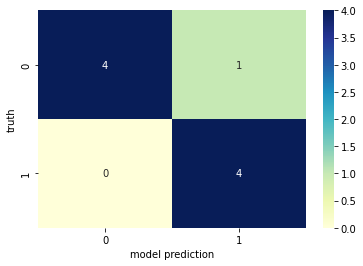

In [49]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu")
plt.xlabel("model prediction")
plt.ylabel("truth")
plt.show()

In [34]:
accuracy_score(y_test, y_pred)

0.8888888888888888

## Neural network

In [90]:
# sub in matrix/metadata file with subsetted mt
X = mtressubset_MDDcontrol
Y = matrix_metadata_MDDcontrol[["diagnosis_binary"]]

In [91]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
x_train = np.asarray(x_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
x_test = np.asarray(x_train).astype(np.float32)
y_test = np.asarray(y_train).astype(np.float32)

In [92]:
model = Sequential()
model.add(Dense(8, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [93]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [94]:
history = model.fit(x_train, y_train, epochs=200,  validation_split=0.2, batch_size=10, verbose=1)

Epoch 1/200
3/3 [==============================] - 1s 93ms/step - loss: 11773.1973 - accuracy: 0.5000 - val_loss: 9928.7236 - val_accuracy: 0.4286
Epoch 2/200
3/3 [==============================] - 0s 37ms/step - loss: 10532.0820 - accuracy: 0.5000 - val_loss: 9011.8418 - val_accuracy: 0.4286
Epoch 3/200
3/3 [==============================] - 0s 19ms/step - loss: 9601.5605 - accuracy: 0.5000 - val_loss: 8184.3203 - val_accuracy: 0.4286
Epoch 4/200
3/3 [==============================] - 0s 19ms/step - loss: 8616.6201 - accuracy: 0.5000 - val_loss: 7312.3198 - val_accuracy: 0.4286
Epoch 5/200
3/3 [==============================] - 0s 36ms/step - loss: 7738.8359 - accuracy: 0.5000 - val_loss: 6487.9404 - val_accuracy: 0.4286
Epoch 6/200
3/3 [==============================] - 0s 30ms/step - loss: 7002.8271 - accuracy: 0.5000 - val_loss: 5720.4268 - val_accuracy: 0.4286
Epoch 7/200
3/3 [==============================] - 0s 19ms/step - loss: 6184.0859 - accuracy: 0.5000 - val_loss: 5026.3672

3/3 [==============================] - 0s 19ms/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6901 - val_accuracy: 0.5714
Epoch 117/200
3/3 [==============================] - 0s 29ms/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6901 - val_accuracy: 0.5714
Epoch 118/200
3/3 [==============================] - 0s 17ms/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6901 - val_accuracy: 0.5714
Epoch 119/200
3/3 [==============================] - 0s 19ms/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6902 - val_accuracy: 0.5714
Epoch 120/200
3/3 [==============================] - 0s 15ms/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6902 - val_accuracy: 0.5714
Epoch 121/200
3/3 [==============================] - 0s 16ms/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6902 - val_accuracy: 0.5714
Epoch 122/200
3/3 [==============================] - 0s 17ms/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6902 - val_accuracy: 0.5714
Epoch 123/200
3/3 [=

Epoch 174/200
3/3 [==============================] - 0s 22ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6906 - val_accuracy: 0.5714
Epoch 175/200
3/3 [==============================] - 0s 18ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6906 - val_accuracy: 0.5714
Epoch 176/200
3/3 [==============================] - 0s 15ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6906 - val_accuracy: 0.5714
Epoch 177/200
3/3 [==============================] - 0s 16ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6906 - val_accuracy: 0.5714
Epoch 178/200
3/3 [==============================] - 0s 18ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6906 - val_accuracy: 0.5714
Epoch 179/200
3/3 [==============================] - 0s 15ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6906 - val_accuracy: 0.5714
Epoch 180/200
3/3 [==============================] - 0s 16ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6906 - val_accuracy: 0.5714
Epoch 

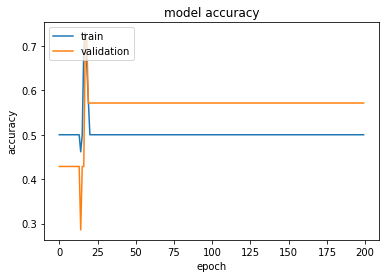

In [95]:
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="validation")
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc='upper left')
plt.show()

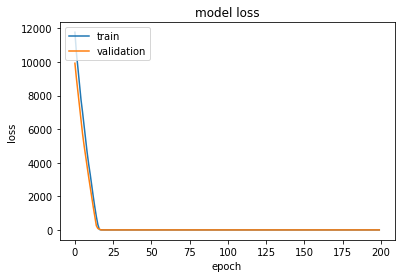

In [96]:
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="validation")
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc='upper left')
plt.show()

In [97]:
score = model.evaluate(x_test, y_test, verbose=0)
score

[0.6927514672279358, 0.5151515007019043]

In [98]:
predictions = model.predict(x_test)
predictions.round(1)

array([[0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5]], dtype=float32)

In [99]:
np.rint(predictions)

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

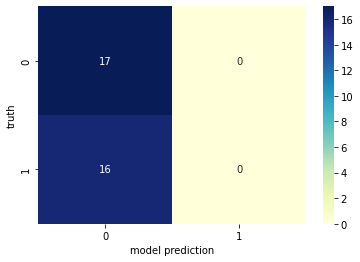

In [100]:
confusion_matrix = sklearn.metrics.confusion_matrix(y_test, np.rint(predictions))
sns.heatmap(confusion_matrix, annot=True, cmap="YlGnBu")
plt.xlabel("model prediction")
plt.ylabel("truth")
plt.show()

## Lasso

In [183]:
# input/output info
x = mtressubset_MDDcontrol
y = matrix_metadata_MDDcontrol["clinical_diagnosis"].replace({"MDD":1, "control":0})

In [185]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

In [186]:
clf = LogisticRegression(solver='liblinear', max_iter=5000, penalty="l1")
clf.fit(x_train.values, y_train.values)

LogisticRegression(max_iter=5000, penalty='l1', solver='liblinear')

In [187]:
y_pred = clf.predict(x_test)
y_pred

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([1, 1, 0, 1, 0, 1, 0, 1, 0])

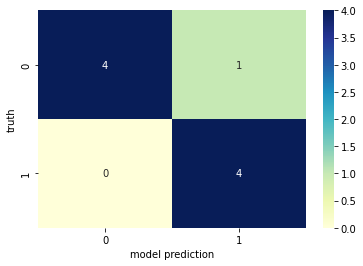

In [188]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu")
plt.xlabel("model prediction")
plt.ylabel("truth")
plt.show()

In [189]:
accuracy_score(y_test, y_pred)

0.8888888888888888

In [190]:
print('Coefficient of each feature:', clf.coef_)

Coefficient of each feature: [[ 0.00000000e+00  0.00000000e+00  1.03847775e-04  0.00000000e+00
  -4.27469245e-06  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.22841352e-02
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -3.20945887e-03  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -9.39123429e-05  0.00000000e+00
  -4.06545887e-05  0.00000000e+00 -6.62643447e-03  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -1.08590554e-04  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+

In [155]:
print(x)

   ENST00000535515.5 ENST00000574494.1 ENST00000531227.1 ENST00000563462.1  \
0                0.0               0.0               0.0        324.408404   
1                0.0               0.0               0.0        338.476991   
2                0.0               0.0               0.0        250.746133   
3                0.0               0.0               0.0        272.295286   
4                0.0               0.0               0.0        249.150456   
5           0.563421               0.0          4.998954        294.809107   
6                0.0               0.0               0.0        281.617514   
7                0.0               0.0          3.645567        224.905023   
8                0.0               0.0               0.0        260.172605   
9                0.0               0.0          3.334666        411.727396   
10               0.0               0.0               0.0        463.789478   
11          1.445471               0.0          3.698984        

### Lasso + CV

In [191]:
clf = LogisticRegressionCV(solver='liblinear', max_iter=5000, penalty="l1", cv=10)
clf.fit(x.values, y.values)

LogisticRegressionCV(cv=10, max_iter=5000, penalty='l1', solver='liblinear')

In [194]:
y_pred = clf.predict(x)
y_pred

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegressionCV was fitted without feature names
  warnings.warn(


array([1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0])

In [195]:
clf.score(x, y)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegressionCV was fitted without feature names
  warnings.warn(


1.0

In [196]:
print('Coefficient of each feature:', clf.coef_)

Coefficient of each feature: [[ 0.00000000e+00  0.00000000e+00 -4.90407197e-06  0.00000000e+00
   4.34082694e-06  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -4.19511001e-02  0.00000000e+00  0.00000000e+00 -7.14973486e-05
   1.03975897e-02  0.00000000e+00  1.21644539e-03  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -3.81781162e-03  0.00000000e+00  0.00000000e+00  2.35325871e-03
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -8.11205329e-03  8.16069393e-02
   0.00000000e+00  0.00000000e+00 -9.43248932e-04  0.00000000e+00
   0.00000000e+00  1.03215385e-03 -2.66605742e-06  0.00000000e+00
  -2.75440995e-06  2.07648875e-02 -6.37450218e-03  5.52867923e-05
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.06219791e-03
   4.55830981e-04 -1.47505385e-05  0.00000000e+00  0.00000000e+00
   3.15775212e-03  0.00000000e+00 -1.52158462e-

In [179]:
print(x.values())

TypeError: 'numpy.ndarray' object is not callable

### Boxplots of important Lasso features

<AxesSubplot:xlabel='diagnosis_binary', ylabel='ENST00000369669.5'>

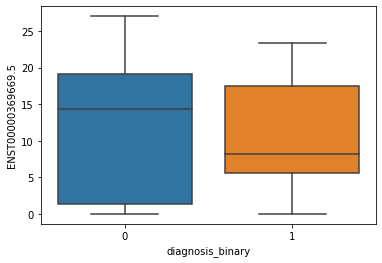

In [86]:
matrix_metadata_MDDcontrol['ENST00000369669.5']
sns.boxplot(x=matrix_metadata_MDDcontrol['diagnosis_binary'], y=matrix_metadata_MDDcontrol['ENST00000369669.5'])